In [8]:


import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

In [9]:

# %matplotlib qt


def calibrate():
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('../camera_cal/calibration*.jpg')

    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            cv2.imshow('img',img)
            cv2.waitKey(500)

    cv2.destroyAllWindows()
    return objpoints, imgpoints



# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    # undist = np.copy(img)  # Delete this line
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # Undistorting a test image:
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    return undist

In [179]:
# image = mpimg.imread('../img/signs_vehicles_xygrad.jpg')
image = mpimg.imread('../test_images/straight_lines1.jpg')

(720, 1280, 3)

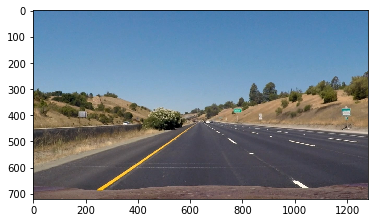

In [180]:
plt.imshow(image)
image.shape

In [181]:
objpoints, imgpoints = calibrate()

In [182]:
undistorted = cal_undistort(image, objpoints, imgpoints)

In [191]:
height = img_shape[1]
width = img_shape[0]
offset = (-2, 0)

# src = np.float32([[width * .49 ,height * 0.6],
#                 [width * 0.2 , height * 0.95],
#                 [width * .8, height * 0.95],
#                 [width * 0.51, height * 0.6]])
# dst = np.float32([[width * .2,height * 0.0],
#                 [width * 0.2 , height * 0.95],
#                 [width * .8, height * 0.95],
#                 [width * 0.8, height * 0.0]])

# src = np.float32([[width * .48 + offset[0],height * 0.6],
#                 [width * 0.18 + offset[0], height * 0.95],
#                 [width * .82 + offset[0], height * 0.95],
#                 [width * 0.52 + offset[0], height * 0.6]])
# dst = np.float32([[width * .18,height * 0.0],
#                 [width * 0.18 , height * 0.95],
#                 [width * .8, height * 0.95],
#                 [width * 0.82, height * 0.0]])


src = np.float32([[width * .48 + offset[0],height * 0.6],
                [width * 0.18 + offset[0], height * 0.95],
                [width * .82 + offset[0], height * 0.95],
                [width * 0.52 + offset[0], height * 0.6]])
dst = np.float32([[width * .18,height * 0.0],
                [width * 0.18 , height * 0.95],
                [width * .8, height * 0.95],
                [width * 0.82, height * 0.0]])


# offset = 10 # offset for dst points
# Grab the image shape
img_shape = (image.shape[1], image.shape[0])
print(img_shape)

# For source points I'm grabbing the outer four detected corners
# src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
# For destination points, I'm arbitrarily choosing some points to be
# a nice fit for displaying our warped result 
# again, not exact, but close enough for our purposes
# dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
#                          [img_size[0]-offset, img_size[1]-offset], 
#                          [offset, img_size[1]-offset]])


(1280, 720)


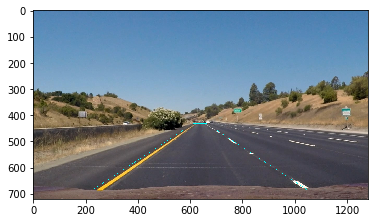

In [184]:
# pts = src.reshape((-1,1,2))
# img = np.zeros((512,512,3), np.uint8)



# src = np.array([[width * .48,height * 0.6],
#                 [width * 0.15 , height * 0.95],
#                 [width * .85, height * 0.95],
#                 [width * 0.52, height * 0.6]], np.int32)
pts = src.astype(np.int32).reshape((-1,1,2))
cv2.polylines(image,[pts],True,(0,255,255))

plt.imshow(image)
# cv2.polylines(image,[src],True,(0,255,255))

In [188]:
M = cv2.getPerspectiveTransform(src, dst)

# e) use cv2.warpPerspective() to warp your image to a top-down view
warped = cv2.warpPerspective(image, M, img_shape, flags=cv2.INTER_LINEAR)

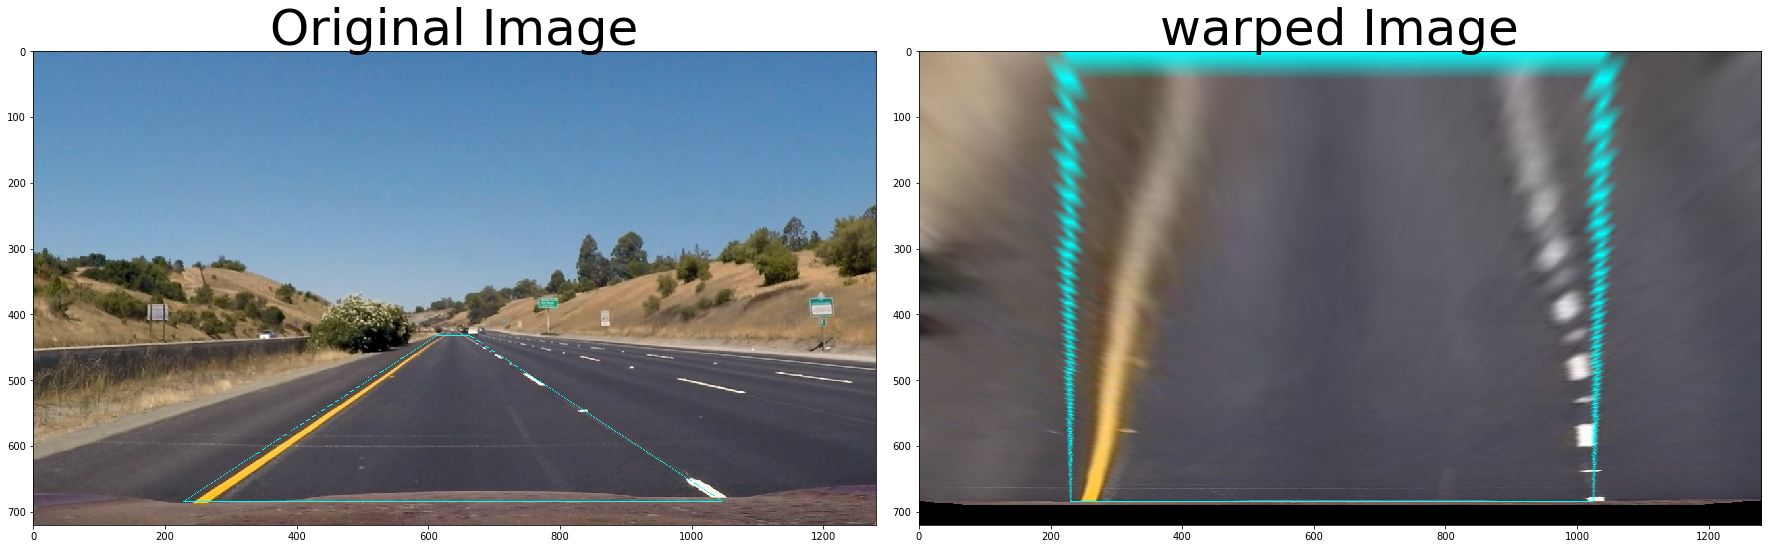

In [189]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

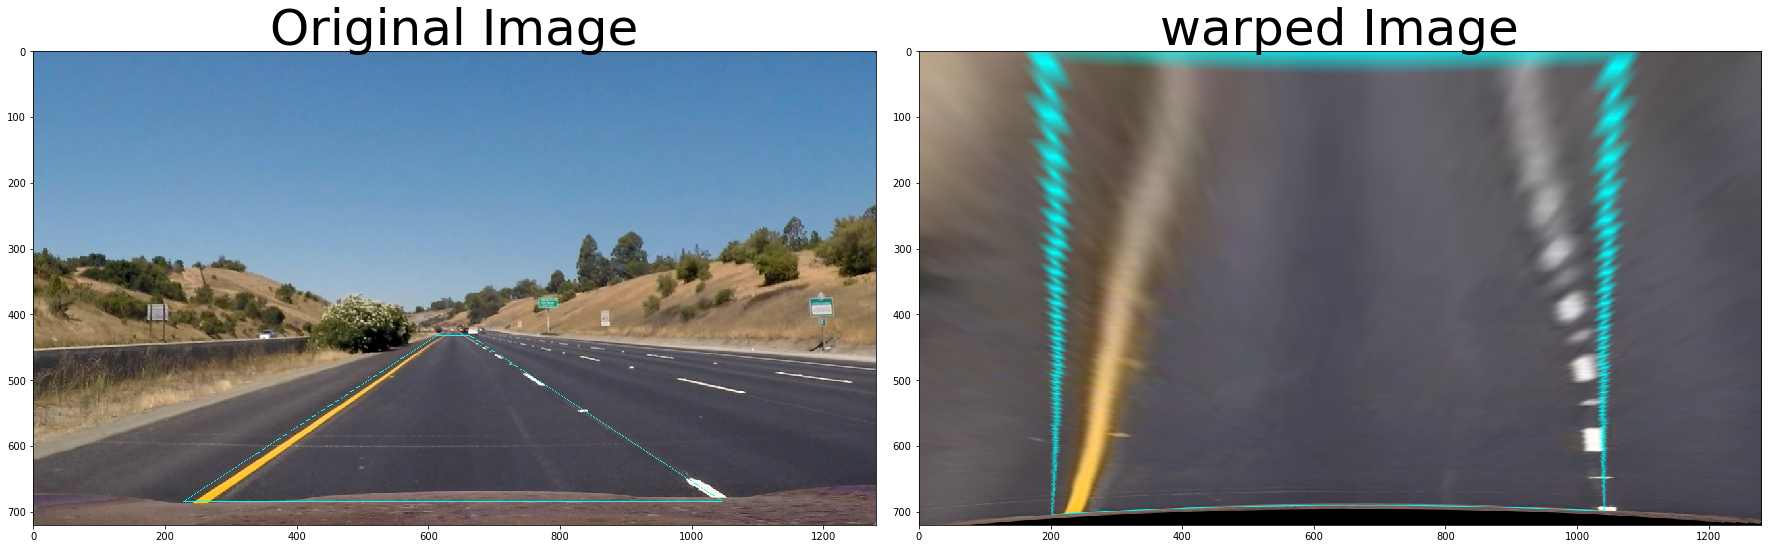

In [190]:
undistorted = cal_undistort(warped, objpoints, imgpoints)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [16]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

In [21]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image.shape[::2], None, None)

# warped, M = corners_unwarp(img, nx, ny, mtx, dist)

In [17]:
def corners_unwarp(img, src, dst):
    # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)

    img_size = img.shape[::2]
    # e) use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

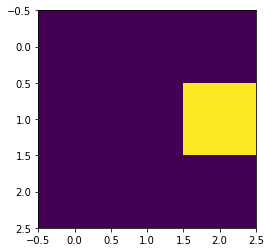

In [26]:
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
# plt.imshow(M)

plt.imshow(Minv)
# img_size = image.shape[::2]
# warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR)
# plt.imshow(warped)

In [19]:
unwarped = corners_unwarp(image, src, dst)

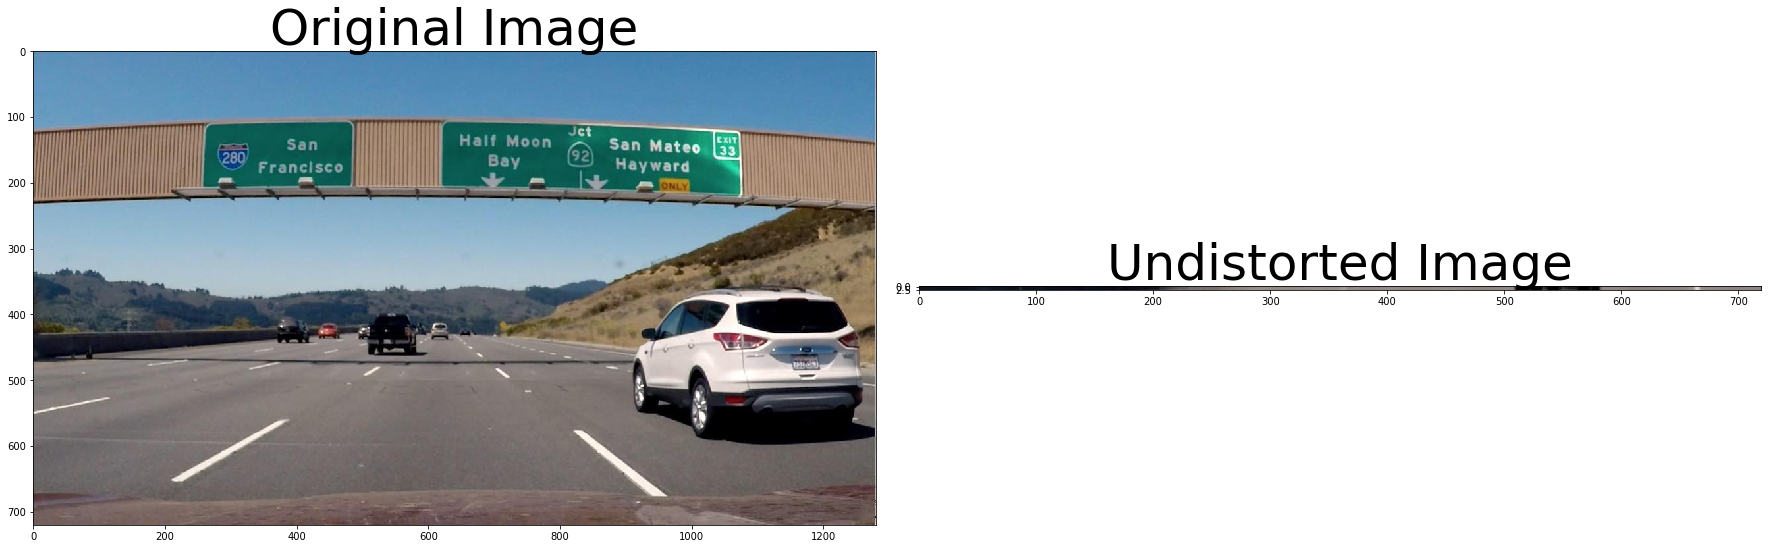

In [20]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(unwarped)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)